<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering </h2>
<h2>Team 14 </h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesis on Features to Engineer</h3><br>



We assume that the features that we will add all would have a positive corelation with either Sale_Price and log_Sale_Price as they are all generally considered desirable and are likely to increase the value of a home in this housing market, we have chosen to implement 7 new features, test their significance and then decide which ones are highly correlated with the response variables : 

- "Home_Size_Ratio": It is hypothesized that this feature will have a positive effect on both Sale_Price and log_Sale_Price. As larger homes with more open space tend to be more desirable and sell for more, we expect that lower values of this feature will be associated with higher sale prices.

- "Bathroom_Ratio": It is hypothesized that this feature will also have a positive effect on both Sale_Price and log_Sale_Price. As homes with more bathrooms tend to be more desirable and sell for more, we expect that higher values of this feature will be associated with higher sale prices.

- "Garage_Ratio": It is hypothesized that this feature will have a positive effect on both Sale_Price and log_Sale_Price. As homes with larger garages tend to be more desirable and sell for more, we expect that higher values of this feature will be associated with higher sale prices.

- "totalSqFeet": we assume that the total square feet area of the basement, first and second floor will drive the price or the log(Price) to be higher, since the bigger the house is the higher the price 

- "Area1st2nd": The sum area of the first and second floor tend to make the house more expensive,  will have a positive effect on Sale_Price and log_Sale_Price, as larger homes and living areas are generally more valuable.

- "Quality_Condition_Score" : This feature represents the total score of house's condition and quality, the higher it is, the more habitable the house is and hence the more expensive it becomes 

- "extra_amenities " : This feature will assess the availability of amenities in the house such as fireplace, porch, pool and garage, in addition to basic amenities such as rooms, kitchen and bath. We assume that a house with extra amenities tends to be more expensive. 


In [47]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from scipy.stats import skew


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'C:/Users/LENOVO/Desktop/Python/Python II/Scripts - Regression Modeling./__datasets/Ames Housing Dataset.xlsx'


# reading the file into Python
housing = pd.read_excel(file)




In [7]:
housing.head(6)

,Order,Lot_Area,Street,Lot_Config,Neighborhood,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price,log_Sale_Price,Home_Size_Ratio,Bathroom_Ratio,Garage_Ratio,totalSqFeet,Area1st2nd,Quality_Condition_Score
0,1,31770,Pave,Corner,NAmes,6,5,112.0,1080.0,1656,0,1656,1,0,1,7,2,2.0,528.0,272,0,215000,12.278393,0.052125,0.142857,0.318841,2736.0,1656,11
1,2,11622,Pave,Inside,NAmes,5,6,0.0,882.0,896,0,896,1,0,1,5,0,1.0,730.0,260,0,105000,11.561716,0.077095,0.200000,0.814732,1778.0,896,11
2,3,14267,Pave,Corner,NAmes,6,6,108.0,1329.0,1329,0,1329,1,1,1,6,0,1.0,312.0,429,0,172000,12.055250,0.093152,0.250000,0.234763,2658.0,1329,12
3,4,11160,Pave,Corner,NAmes,7,5,0.0,2110.0,2110,0,2110,2,1,1,8,2,2.0,522.0,0,0,244000,12.404924,0.189068,0.312500,0.247393,4220.0,2110,12
4,5,13830,Pave,Inside,Gilbert,5,5,0.0,928.0,928,701,1629,2,1,1,6,1,2.0,482.0,246,0,189900,12.154253,0.117787,0.416667,0.295887,2557.0,1629,10
5,6,9978,Pave,Inside,Gilbert,6,6,20.0,926.0,926,678,1604,2,1,1,7,1,2.0,470.0,396,0,195500,12.183316,0.160754,0.357143,0.293017,2530.0,1604,12


**Data cleaning :** 


In [4]:
# in this step, we clean the missing values byfilling them with null values
#instantiating an imputation value
fill = 0


# imputing 'Mas Vnr Area'
housing['Mas_Vnr_Area'] = housing['Mas_Vnr_Area'].fillna(fill)

# imputing everything else with the zero
fill = 0

# Total_Bsmt_SF
housing['Total_Bsmt_SF'] = housing['Total_Bsmt_SF'].fillna(fill)

# Garage_Cars
fill = 0

housing['Garage_Cars'] = housing['Garage_Cars'].fillna(fill)

fill = 0

# Garage_Area
housing['Garage_Area'] = housing['Garage_Area'].fillna(fill)

housing['log_Sale_Price'] = np.log(housing['Sale_Price'])

In [50]:
# placeholder variables
housing['has_Garage']     = 0
housing['has_Porch']      = 0
housing['has_Pool']     = 0
housing['has_Fireplace']     = 0
housing['extra_amenities']     = 0


# iterating over each original column to change values in the new feature columns
#coverting the variables with areas to variables assessing the availability (new_variable=1 if the house has this amenity and its area is different than 0)
for index, value in housing.iterrows():


    # Pool_Area
    if housing.loc[index, 'Pool_Area'] > 0:
        housing.loc[index, 'has_Pool'] = 1
        
        
    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage'] = 1
        
        
    # Fireplaces
    if housing.loc[index, 'Fireplaces'] > 0:
        housing.loc[index, 'has_Fireplace'] = 1
        
        
    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch'] = 1
        


In [48]:
#assessing the skewness of the existing features before adding new ones
housing.skew().sort_values(ascending=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15284\2073769933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.skew().sort_values(ascending=False)


Pool_Area        16.939142
Lot_Area         12.820898
Kitchen_AbvGr     4.313825
Mas_Vnr_Area      2.606985
Sale_Price        1.743500
First_Flr_SF      1.469429
Porch_Area        1.377215
Gr_Liv_Area       1.274110
Total_Bsmt_SF     1.156204
Second_Flr_SF     0.866457
TotRms_AbvGr      0.753543
Fireplaces        0.739215
Half_Bath         0.697713
Overall_Cond      0.574429
Garage_Area       0.241994
Overall_Qual      0.190634
Full_Bath         0.171952
Order             0.000000
Garage_Cars      -0.219836
dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Coding the New Features</h3><br>


In [51]:
# implementing a function that adds all the new features 
def engineer_features(df):
    # Home_Size_Ratio
    df['Home_Size_Ratio'] = df['Gr_Liv_Area'] / df['Lot_Area']
    
    # Bathroom_Ratio
    df['Bathroom_Ratio'] = (df['Full_Bath'] + 0.5 * df['Half_Bath']) / df['TotRms_AbvGr']
    
    # Garage_Ratio
    df['Garage_Ratio'] = df['Garage_Area'] / df['Gr_Liv_Area']
    
    #totalSqFeet
    df['totalSqFeet'] = df['Total_Bsmt_SF'] + df['First_Flr_SF'] + df['Second_Flr_SF']
    
    # Total livavle area, areas of first and second floor
    df['Area1st2nd']= df['First_Flr_SF'] + df['Second_Flr_SF']
    
    # Overall Score 
    df['Quality_Condition_Score'] = df['Overall_Qual'] + df['Overall_Cond']
    
    #Total Bathroom Ratio per Rooms including kitchen
    df['Total_Bath']= df['Full_Bath']+(df['Half_Bath']/2)
    df['Total_Rooms']=df['TotRms_AbvGr']+df['Kitchen_AbvGr']
    df['Bath_per_Rm_Ratio']=df['Total_Bath']/df['Total_Rooms']
    
    
    #Extra Amenities, which ranges from 0 to 4 depending on the number of amenities a house has 
    df['extra_amenities'] =df['has_Garage']+df['has_Pool']+df['has_Fireplace']+df['has_Porch'] 
    

    
    return df

new_housing = engineer_features(housing)
#assessing the skewness of the new features 
new_housing.skew().sort_values(ascending=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15284\4008480468.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_housing.skew().sort_values(ascending=False)


Pool_Area                  16.939142
has_Pool                   14.920355
Lot_Area                   12.820898
Kitchen_AbvGr               4.313825
Home_Size_Ratio             2.809460
Mas_Vnr_Area                2.606985
Sale_Price                  1.743500
totalSqFeet                 1.517129
First_Flr_SF                1.469429
Porch_Area                  1.377215
Gr_Liv_Area                 1.274110
Area1st2nd                  1.256781
Total_Bsmt_SF               1.156204
Total_Rooms                 0.877349
Second_Flr_SF               0.866457
Bathroom_Ratio              0.775376
TotRms_AbvGr                0.753543
Fireplaces                  0.739215
Half_Bath                   0.697713
Overall_Cond                0.574429
Bath_per_Rm_Ratio           0.569675
Garage_Ratio                0.542184
Total_Bath                  0.308101
Garage_Area                 0.241994
Overall_Qual                0.190634
Full_Bath                   0.171952
Order                       0.000000
h

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Checking the Results</h3><br>
Developing a correlation matrix or a heatmap to show the linear relationships between the new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

-----------------Correlation Matrix of the Price-----------------

totalSqFeet                0.79
Area1st2nd                 0.71
Quality_Condition_Score    0.59
extra_amenities            0.51
Bath_per_Rm_Ratio          0.35
Bathroom_Ratio             0.29
Garage_Ratio               0.11
Home_Size_Ratio           -0.00
Name: Sale_Price, dtype: float64

-----------------Correlation Matrix of log Price-----------------

totalSqFeet                0.78
Area1st2nd                 0.70
Quality_Condition_Score    0.65
extra_amenities            0.56
Bath_per_Rm_Ratio          0.41
Bathroom_Ratio             0.34
Garage_Ratio               0.14
Home_Size_Ratio           -0.00
Name: log_Sale_Price, dtype: float64


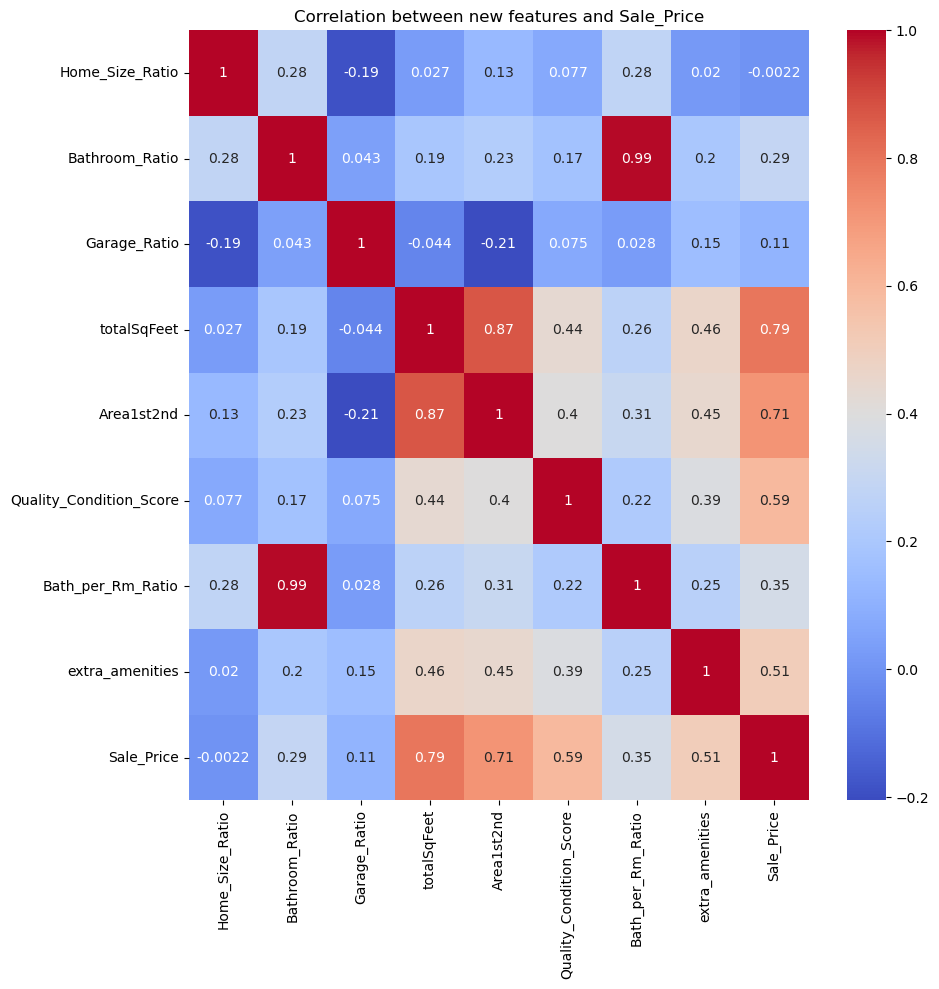

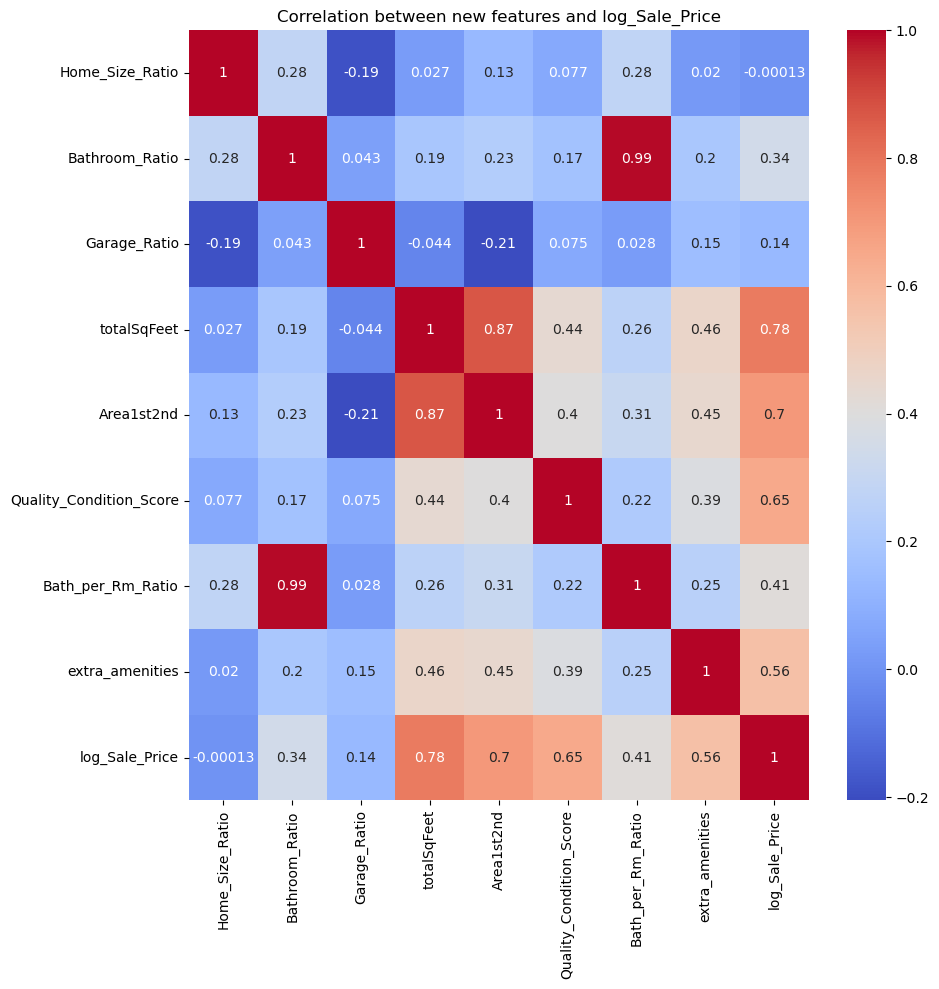

In [46]:
#implement a function to plot the heatmap of correlation matrix between the new features and the response varibale 
def plot_correlation_heatmap(df, response_variable):
    corr = df.corr()
    plt.figure(figsize=(10,10))
    variables = ['Home_Size_Ratio', 'Bathroom_Ratio', 'Garage_Ratio', 'totalSqFeet','Area1st2nd', 'Quality_Condition_Score', 'Bath_per_Rm_Ratio','extra_amenities', response_variable]
    subset_corr = corr.loc[variables, variables]

# Create a heatmap of the correlation matrix
    sns.heatmap(subset_corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation between new features and {response_variable}')
    plt.show()

#implement a function for the correlation matrix between the new features and the response varibale 
def plot_correlation_matrix(df, response_variable):
    corl = df.corr(method = 'pearson').round(decimals = 2)
    corr = corl.loc[response_variable,['Home_Size_Ratio', 'Bathroom_Ratio', 'Garage_Ratio', 'totalSqFeet','Area1st2nd', 'Quality_Condition_Score', 'Bath_per_Rm_Ratio','extra_amenities']].sort_values(ascending = False)
    print(corr)

print("-----------------Correlation Matrix of the Price-----------------\n")
plot_correlation_matrix(housing, 'Sale_Price')
print("\n-----------------Correlation Matrix of log Price-----------------\n")
plot_correlation_matrix(housing, 'log_Sale_Price')

plot_correlation_heatmap(housing, 'Sale_Price')
plot_correlation_heatmap(housing, 'log_Sale_Price')



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explaining the Results</h3><br>


After analyzing the correlation between the new added features and the response variables, we observed that :

- totalSqFeet : we tested correlation between the total size of the house and the price of the house and the logarithmic price, for which we got a 0.79 and 0.78 positive correlation respectively. Our hypothesis was verified since the bigger the house (total area) the more expensive it is.

- Area1st2nd :  we tested the correlation between the area of the first and second floor against the price of the house and logarithmic price of the house. For this, we got a positive correlation of 0.71 and 0.70 respectively. Again, hypothesis verified, since the area is generally posivitely correlated to the price.

- Quality_Condition_Score : we checked the quality conditions of the houses as a feature against the price and logarithmic price of the house and we got a positive correlation of 0.59 and 0.65 respectively. The hypothesis is verified, the better is the condition and the quality of the house, the higher the price will be. 

- extra_amenities : we tested for correlation between price of the house and logarithmic price of the house, against extra amenities, which are amenities available in the house, in addition to basic ones such as rooms, kitchen and bath. Examples of extra amenities relevant to our correlation model include fireplace(s), garage, porch and pool. For this test, we got a positive correlation of 0.51 and 0.56 respectively. Those amenities sometimes imply an additional cost and make the house more desirable, that is why houses with extra amenities can be more expensive.

- For the rest of the features : Bath_per_Rm_Ratio, Bathroom_Ratio, Garage_Ratio, Home_Size_Ratio; their correlation ratio with Sale_Price or Log_Sale_Price was under 0.5, they are positively correlated but the ratio is lower. 

- Through our analysis, we choose to stick only with these three features : "totalSqFeet", "Quality_Condition_Score" and "extra_amenities" since they have higher correlation, they aggregrate many features and they are not redundant.



